## FAKE NEWS DETECTION USING NEURAL NETWORKS ON TENSORFLOW
<h1>Technologies used:</h1>
* Tensorflow Neural Networks
 

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np

#-----------NLP library
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [2]:
# Other ML libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from tensorflow import keras
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import losses
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

[nltk_data] Downloading package punkt to /home/eliudluda/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/eliudluda/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/eliudluda/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Loading the data

In [3]:
# Load datasets

US_news = pd.read_csv('/home/eliudluda/Desktop/Data_Science/data/news_data/Fake.csv')
US_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# size
US_news.shape

(23481, 4)

## Data Cleaning

### Dropping unneccessary columns

In [ ]:
# US news

US_news.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
US_news.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


### Null values

In [ ]:
# Check in both

US_news.isna().sum()

title      0
text       0
subject    0
label      0
dtype: int64

## EDA

/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

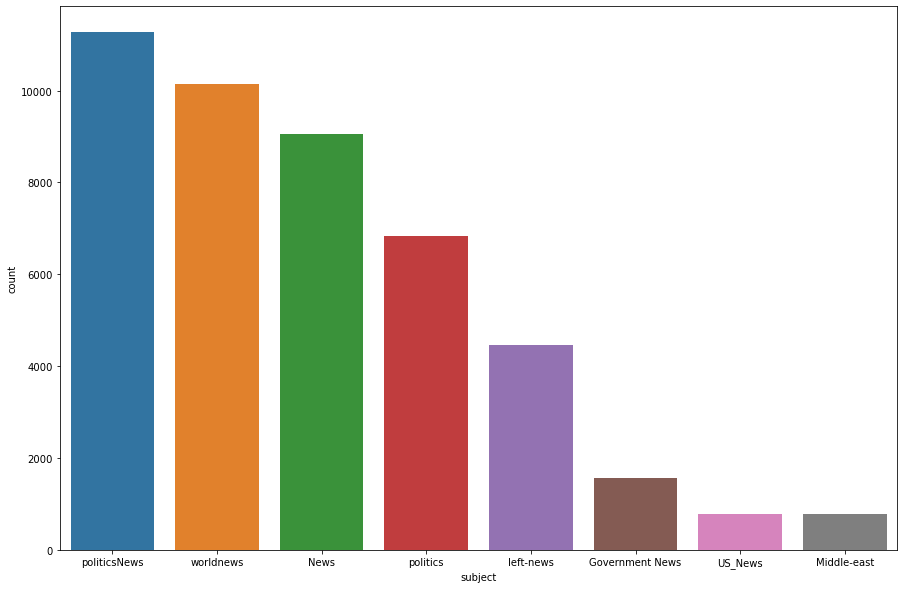

In [ ]:
# Check for most popular news category

# 1. US Dataset

plt.figure(figsize=(15, 10))

sns.countplot(US_news['subject'], order=US_news['subject'].value_counts().index)


/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

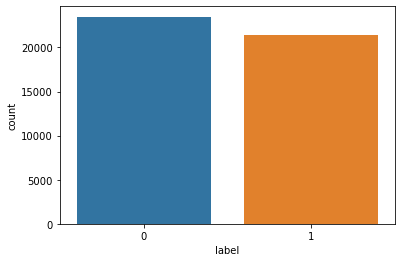

In [ ]:
# Fake news vs true news

sns.countplot(US_news['label'], order=US_news['label'].value_counts().index)

## Preprocessing

## 1. Title alone

In [ ]:
US_news.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


In [ ]:
# Due to how outrageous the headlines are, we will use the headlines to roughly detect whether the headline is true or false

# Stopwords

# Stopwords
stop_words = stopwords.words('english')

def stopwords_remover(text):
    return " ".join([word for word in text.split() if word.lower() not in stop_words])


In [ ]:
US_news['title'] = US_news['title'].apply(lambda text: stopwords_remover(text))
US_news['title'].head(10)

0    Donald Trump Sends Embarrassing New Year’s Eve...
1    Drunk Bragging Trump Staffer Started Russian C...
2    Sheriff David Clarke Becomes Internet Joke Thr...
3    Trump Obsessed Even Obama’s Name Coded Website...
4    Pope Francis Called Donald Trump Christmas Speech
5    Racist Alabama Cops Brutalize Black Boy Handcu...
6    Fresh Golf Course, Trump Lashes FBI Deputy Dir...
7    Trump Said INSANELY Racist Stuff Inside Oval O...
8    Former CIA Director Slams Trump UN Bullying, O...
9    WATCH: Brand-New Pro-Trump Ad Features Much A*...
Name: title, dtype: object

In [ ]:
# Tokenizing - separate sentences to an array with distinct words
# Tokenizing the words

import nltk
tokenizerr = nltk.word_tokenize

US_news['title'] = US_news['title'].apply(tokenizerr)
US_news['title'].head(10)
 

0    [Donald, Trump, Sends, Embarrassing, New, Year...
1    [Drunk, Bragging, Trump, Staffer, Started, Rus...
2    [Sheriff, David, Clarke, Becomes, Internet, Jo...
3    [Trump, Obsessed, Even, Obama, ’, s, Name, Cod...
4    [Pope, Francis, Called, Donald, Trump, Christm...
5    [Racist, Alabama, Cops, Brutalize, Black, Boy,...
6    [Fresh, Golf, Course, ,, Trump, Lashes, FBI, D...
7    [Trump, Said, INSANELY, Racist, Stuff, Inside,...
8    [Former, CIA, Director, Slams, Trump, UN, Bull...
9    [WATCH, :, Brand-New, Pro-Trump, Ad, Features,...
Name: title, dtype: object

In [ ]:
# Removing Punctuation marks
import string
string.punctuation

# Function that iterates throung the words, removing punctuation
def punctuation_remover(text):
    no_puncts = [word for word in text if word not in string.punctuation]
    return no_puncts

In [ ]:
US_news['title'] = US_news['title'].apply(lambda text : punctuation_remover(text))
US_news['title'].head(10)

0    [Donald, Trump, Sends, Embarrassing, New, Year...
1    [Drunk, Bragging, Trump, Staffer, Started, Rus...
2    [Sheriff, David, Clarke, Becomes, Internet, Jo...
3    [Trump, Obsessed, Even, Obama, ’, s, Name, Cod...
4    [Pope, Francis, Called, Donald, Trump, Christm...
5    [Racist, Alabama, Cops, Brutalize, Black, Boy,...
6    [Fresh, Golf, Course, Trump, Lashes, FBI, Depu...
7    [Trump, Said, INSANELY, Racist, Stuff, Inside,...
8    [Former, CIA, Director, Slams, Trump, UN, Bull...
9    [WATCH, Brand-New, Pro-Trump, Ad, Features, Mu...
Name: title, dtype: object

In [ ]:
# Stemming

# This is where words are diminished to their root form

stemmer = PorterStemmer()

def text_stemmer(text):
    stemmed = [stemmer.stem(word) for word in text]
    return stemmed

In [ ]:
# Apply on the title
US_news['title'] = US_news['title'].apply(lambda text: text_stemmer(text))
US_news['title'].head(10)

0    [donald, trump, send, embarrass, new, year, ’,...
1    [drunk, brag, trump, staffer, start, russian, ...
2    [sheriff, david, clark, becom, internet, joke,...
3    [trump, obsess, even, obama, ’, s, name, code,...
4    [pope, franci, call, donald, trump, christma, ...
5    [racist, alabama, cop, brutal, black, boy, han...
6    [fresh, golf, cours, trump, lash, fbi, deputi,...
7    [trump, said, insan, racist, stuff, insid, ova...
8    [former, cia, director, slam, trump, un, bulli...
9    [watch, brand-new, pro-trump, ad, featur, much...
Name: title, dtype: object

In [ ]:
lemma = WordNetLemmatizer()

def text_lemma(text):
    stemmed2 = [lemma.lemmatize(word) for word in text]
    return stemmed2

In [ ]:
# Lemmatization

# opposite of stemming, where it is enforced to ensure the words havent lost meaning

lemma = WordNetLemmatizer()

US_news['title'] = US_news['title'].apply(lambda text: text_lemma(text))
US_news['title'].head(10)

0    [donald, trump, send, embarrass, new, year, ’,...
1    [drunk, brag, trump, staffer, start, russian, ...
2    [sheriff, david, clark, becom, internet, joke,...
3    [trump, ob, even, obama, ’, s, name, code, web...
4    [pope, franci, call, donald, trump, christma, ...
5    [racist, alabama, cop, brutal, black, boy, han...
6    [fresh, golf, cours, trump, lash, fbi, deputi,...
7    [trump, said, insan, racist, stuff, insid, ova...
8    [former, cia, director, slam, trump, un, bulli...
9    [watch, brand-new, pro-trump, ad, featur, much...
Name: title, dtype: object

In [ ]:
# Join the text

US_news['title'] = US_news['title'].apply(lambda x: ' '.join(x))
US_news['title']

0        donald trump send embarrass new year ’ s eve m...
1        drunk brag trump staffer start russian collus ...
2        sheriff david clark becom internet joke threat...
3            trump ob even obama ’ s name code websit imag
4            pope franci call donald trump christma speech
                               ...                        
44893    'fulli commit nato back new u.s. approach afgh...
44894          lexisnexi withdrew two product chine market
44895                        minsk cultur hub becom author
44896      vatican upbeat possibl pope franci visit russia
44897         indonesia buy 1.14 billion worth russian jet
Name: title, Length: 44898, dtype: object

In [ ]:
# Hot encode the label

US_news = pd.get_dummies(US_news, columns = ['label'])
US_news

,title,text,subject,label_0,label_1
0,donald trump send embarrass new year ’ s eve m...,Donald Trump just couldn t wish all Americans ...,News,1,0
1,drunk brag trump staffer start russian collus ...,House Intelligence Committee Chairman Devin Nu...,News,1,0
2,sheriff david clark becom internet joke threat...,"On Friday, it was revealed that former Milwauk...",News,1,0
3,trump ob even obama ’ s name code websit imag,"On Christmas day, Donald Trump announced that ...",News,1,0
4,pope franci call donald trump christma speech,Pope Francis used his annual Christmas Day mes...,News,1,0
...,...,...,...,...,...
44893,'fulli commit nato back new u.s. approach afgh...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,0,1
44894,lexisnexi withdrew two product chine market,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,0,1
44895,minsk cultur hub becom author,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,0,1
44896,vatican upbeat possibl pope franci visit russia,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,0,1


In [ ]:
# Rename the encoded columns
US_news =US_news.rename(columns={'label_0' : 'Fake', 'label_1' : 'True'})
US_news

,title,text,subject,Fake,True
0,donald trump send embarrass new year ’ s eve m...,Donald Trump just couldn t wish all Americans ...,News,1,0
1,drunk brag trump staffer start russian collus ...,House Intelligence Committee Chairman Devin Nu...,News,1,0
2,sheriff david clark becom internet joke threat...,"On Friday, it was revealed that former Milwauk...",News,1,0
3,trump ob even obama ’ s name code websit imag,"On Christmas day, Donald Trump announced that ...",News,1,0
4,pope franci call donald trump christma speech,Pope Francis used his annual Christmas Day mes...,News,1,0
...,...,...,...,...,...
44893,'fulli commit nato back new u.s. approach afgh...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,0,1
44894,lexisnexi withdrew two product chine market,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,0,1
44895,minsk cultur hub becom author,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,0,1
44896,vatican upbeat possibl pope franci visit russia,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,0,1


In [ ]:
#Split into X and y

X =  US_news['title']
y = US_news[['Fake', 'True']]

In [ ]:
y

,Fake,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
44893,0,1
44894,0,1
44895,0,1
44896,0,1


In [ ]:
# Tokenizing

# Get the total amount of unique words

from nltk import word_tokenize

In [ ]:
list_words_us = []

for i in US_news.title:
  for j in i:
    list_words_us.append(j)

In [ ]:
len(list_words_us)

2762609

In [ ]:
#Unigue words
unique_w = len(list(set(list_words_us)))
unique_w

74

In [ ]:
# Tokenizing
tokenizer_FN = Tokenizer(num_words=10000)
tokenizer_FN.fit_on_texts(X)

sequence = tokenizer_FN.texts_to_sequences(X)

In [ ]:
# Pickling the tokenizer model

import pickle

pickle_out = open('tokenizer_FN2.pickle', 'wb')

pickle.dump(tokenizer_FN, pickle_out)

pickle_out.close()

In [ ]:
# Padding - require to be same length

padded_text = pad_sequences(sequence, maxlen=30)

padded_text

array([[   0,    0,    0, ..., 2555,  396, 1285],
       [   0,    0,    0, ...,   65, 1381,  177],
       [   0,    0,    0, ...,  280,  572,    2],
       ...,
       [   0,    0,    0, ..., 3686,  532,  854],
       [   0,    0,    0, ..., 2868,  178,   25],
       [   0,    0,    0, ..., 2168,   65, 1495]], dtype=int32)

In [ ]:
len(padded_text)

44898

In [ ]:
# Split into train and test data

X_train, X_test, y_train, y_test = train_test_split(padded_text, y, test_size=0.2, random_state=0)

In [ ]:
y_test

,Fake,True
35305,0,1
29180,0,1
29805,0,1
38237,0,1
5099,1,0
...,...,...
37781,0,1
2275,1,0
19324,1,0
1178,1,0


# Modelling a Neural Networks Model

In [ ]:
FN_model = tf.keras.Sequential([
    layers.Embedding(10000, 50, input_length=30),
    layers.LSTM(64),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation = 'sigmoid')
])

FN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 50)            500000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 546,594
Trainable params: 546,594
Non-trainable params: 0
_________________________________________________________________


In [ ]:
FN_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=["CategoricalAccuracy"])

In [ ]:
# Fitting the model

history = FN_model.fit(X_train, y_train, batch_size=80, epochs=10, validation_split=0.1)

Epoch 1/10
405/405 [==============================] - 34s 74ms/step - loss: 0.1471 - categorical_accuracy: 0.9433 - val_loss: 0.0947 - val_categorical_accuracy: 0.9658
Epoch 2/10
405/405 [==============================] - 32s 80ms/step - loss: 0.0525 - categorical_accuracy: 0.9813 - val_loss: 0.0799 - val_categorical_accuracy: 0.9688
Epoch 3/10
405/405 [==============================] - 20s 50ms/step - loss: 0.0285 - categorical_accuracy: 0.9903 - val_loss: 0.0903 - val_categorical_accuracy: 0.9680
Epoch 4/10
405/405 [==============================] - 18s 44ms/step - loss: 0.0184 - categorical_accuracy: 0.9934 - val_loss: 0.1234 - val_categorical_accuracy: 0.9669
Epoch 5/10
405/405 [==============================] - 18s 44ms/step - loss: 0.0095 - categorical_accuracy: 0.9969 - val_loss: 0.1409 - val_categorical_accuracy: 0.9658
Epoch 6/10
405/405 [==============================] - 33s 81ms/step - loss: 0.0085 - categorical_accuracy: 0.9971 - val_loss: 0.1325 - val_categorical_accuracy:

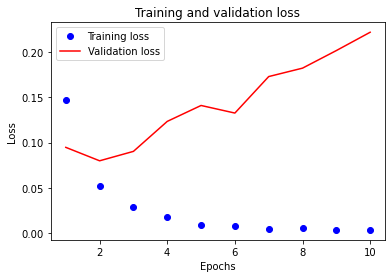

In [ ]:
# Finding the optimal number of epochs

# Training loss vs epochs
history_dict = history.history
history_dict.keys()

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Model with 2 epochs
FN_model.fit(X_train, y_train, batch_size=80, epochs=2, validation_split=0.1)

Epoch 1/2
405/405 [==============================] - 39s 71ms/step - loss: 0.1458 - categorical_accuracy: 0.9473 - val_loss: 0.0893 - val_categorical_accuracy: 0.9677
Epoch 2/2
405/405 [==============================] - 23s 56ms/step - loss: 0.0523 - categorical_accuracy: 0.9808 - val_loss: 0.0816 - val_categorical_accuracy: 0.9685


In [ ]:
# Performing predictions

y_pred = FN_model.predict(X_test)
y_pred

array([[4.8196316e-04, 9.9907595e-01],
       [5.1351964e-02, 9.3095201e-01],
       [1.0536969e-02, 9.8458910e-01],
       ...,
       [9.9819779e-01, 1.3960004e-03],
       [9.8421645e-01, 1.3686806e-02],
       [4.5463443e-03, 9.9268550e-01]], dtype=float32)

In [ ]:
y_pred_cat = np.argmax(y_pred, axis =1 )
y_pred_cat

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
y_test

,Fake,True
35305,0,1
29180,0,1
29805,0,1
38237,0,1
5099,1,0
...,...,...
37781,0,1
2275,1,0
19324,1,0
1178,1,0


In [ ]:
# List of values with the correct values of y

y_test = y_test.idxmax(axis=1).values
conditions = [
    y_test == 'Fake',
    y_test == 'True'
]
values = [0, 1]

y_test = np.select(conditions, values)
y_test

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print('the model has an accuracy of : ', accuracy_score(y_test, y_pred_cat))

the model has an accuracy of :  0.9649220489977728


In [ ]:
def fake_news_classifier():
    text = input('Whats the news headline?')

    #stopwords
    text = stopwords_remover(text)

    # Tokenize the text
    text = tokenizerr(text)

    # Remove punctuation
    text = punctuation_remover(text)

    # Stemming
    text = text_stemmer(text)

    # Lemmatizing
    text = text_lemma(text)

    # Combining the words
    # text = " ".join(text)

    # Tokenizing
    tokens = tokenizer_FN.texts_to_sequences([text])
    
    # Padding
    stemmed_tokens = pad_sequences(tokens, maxlen=30)

    # Pass through the neural network model
    class_prob = FN_model.predict(stemmed_tokens)

    final_class = np.argmax(class_prob)

    if final_class == 0:
        print('The news article is fake')
    else:
        print('The news article is true')
    

    return final_class

In [ ]:
fake_news_classifier()

The news article is true


1

In [ ]:
# Exporting the FN model

from tensorflow import keras
FN_model.save('FakeNews_NN.h5')